In [1]:
#1 Importation des librairies et données

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import dill
avc_data = pd.read_csv("healthcare-dataset-stroke-data.csv",index_col='id')
avc_data.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
#2 Visualisation de données

In [ ]:
avc_data[avc_data['stroke']==1]

In [4]:
avc_data.shape

(5110, 11)

In [5]:
avc_data['work_type'].unique()


array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [6]:
avc_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
avc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 379.3+ KB


In [8]:
avc_data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

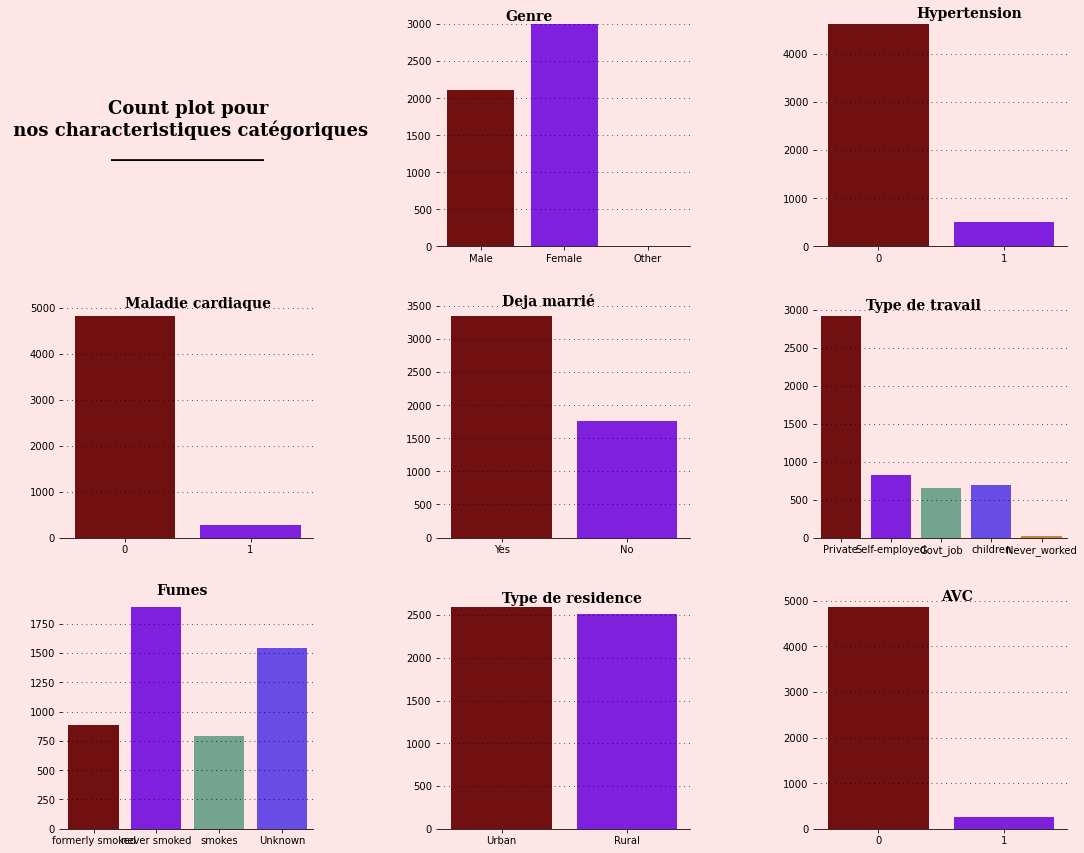

In [9]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)

ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot pour\n nos characteristiques catégoriques\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

ax1.text(0.3, 3050, 'Genre', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=avc_data,x='gender',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

ax2.text(0.3, 4750, 'Hypertension', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=avc_data,x='hypertension',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

ax3.text(0, 5000, 'Maladie cardiaque', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=avc_data,x='heart_disease',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

ax4.text(0, 3500, 'Deja marrié', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=avc_data,x='ever_married',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

ax5.text(0.5, 3000, 'Type de travail', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=avc_data,x='work_type',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

ax6.text(1,2000, 'Fumes', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=avc_data,x='smoking_status',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

ax7.text(0, 2650, 'Type de residence', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=avc_data,x='Residence_type',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

ax8.text(0.5, 5000, 'AVC', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=avc_data,x='stroke',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")


for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

Text(0, 0.5, '')

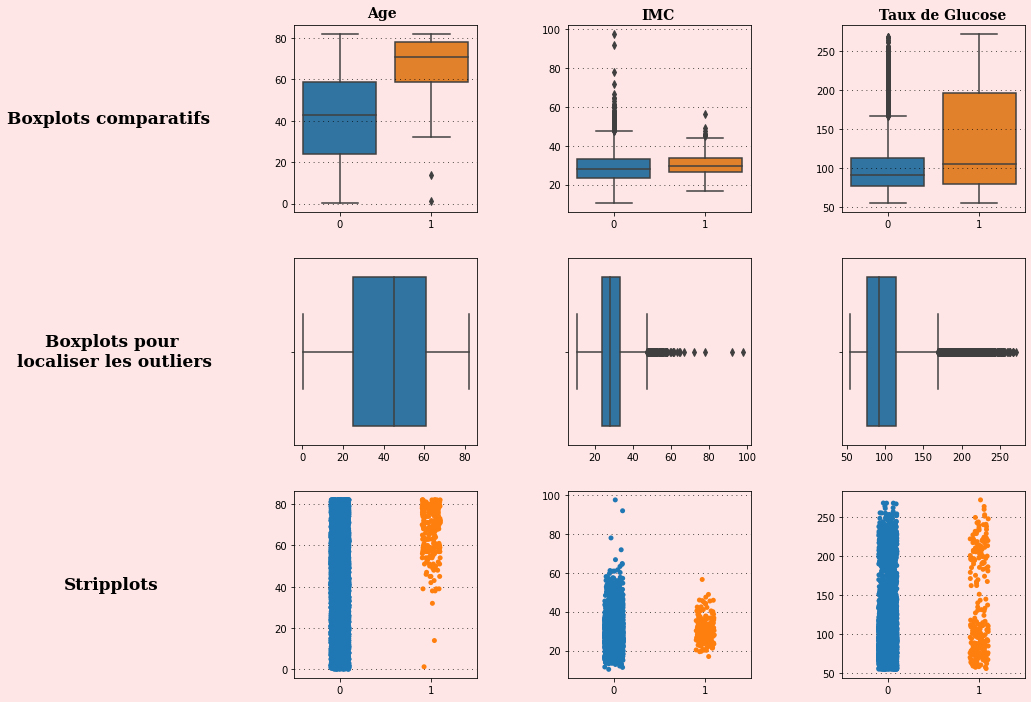

In [10]:
fig = plt.figure(figsize=(18,12))
gs = fig.add_gridspec(3,4)
gs.update(wspace=0.5, hspace=0.25)
tit1 = fig.add_subplot(gs[0,0])
ax0 = fig.add_subplot(gs[0,1])
ax1 = fig.add_subplot(gs[0,2])
ax2 = fig.add_subplot(gs[0,3])
tit2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[1,2])
ax5 = fig.add_subplot(gs[1,3])
tit3 = fig.add_subplot(gs[2,0])
ax6 = fig.add_subplot(gs[2,1])
ax7 = fig.add_subplot(gs[2,2])
ax8 = fig.add_subplot(gs[2,3])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color)
tit1.set_facecolor(background_color) 
tit2.set_facecolor(background_color)
tit3.set_facecolor(background_color)

tit1.spines["bottom"].set_visible(False)
tit1.spines["left"].set_visible(False)
tit1.spines["top"].set_visible(False)
tit1.spines["right"].set_visible(False)
tit1.tick_params(left=False, bottom=False)
tit1.set_xticklabels([])
tit1.set_yticklabels([])
tit1.text(0.5,0.5,
         'Boxplots comparatifs ',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=17, fontweight='bold',
         fontfamily='serif',
         color="#000000")

ax0.text(0.3, 90, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax0.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax0,x='stroke',y='age',data=avc_data)
ax0.set_xlabel("")
ax0.set_ylabel("")

ax1.text(0.3, 105, 'IMC', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax1,x='stroke',y='bmi',data=avc_data)
ax1.set_xlabel("")
ax1.set_ylabel("")

ax2.text(-0.1, 290, 'Taux de Glucose', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax2,x='stroke',y='avg_glucose_level',data=avc_data)
ax2.set_xlabel("")
ax2.set_ylabel("")

tit2.spines["bottom"].set_visible(False)
tit2.spines["left"].set_visible(False)
tit2.spines["top"].set_visible(False)
tit2.spines["right"].set_visible(False)
tit2.tick_params(left=False, bottom=False)
tit2.set_xticklabels([])
tit2.set_yticklabels([])
tit2.text(0.5,0.5,
         'Boxplots pour\n localiser les outliers',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=17, fontweight='bold',
         fontfamily='serif',
         color="#000000")

ax3.text(0, 0, '', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax3,x='age',data=avc_data)
ax3.set_xlabel("")
ax3.set_ylabel("")

ax4.text(0, 0, '', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax4,x='bmi',data=avc_data)
ax4.set_xlabel("")
ax4.set_ylabel("")

ax5.text(0, 0, '', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax5,x='avg_glucose_level',data=avc_data)
ax5.set_xlabel("")
ax5.set_ylabel("")

tit3.spines["bottom"].set_visible(False)
tit3.spines["left"].set_visible(False)
tit3.spines["top"].set_visible(False)
tit3.spines["right"].set_visible(False)
tit3.tick_params(left=False, bottom=False)
tit3.set_xticklabels([])
tit3.set_yticklabels([])
tit3.text(0.5,0.5,
         'Stripplots',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=17, fontweight='bold',
         fontfamily='serif',
         color="#000000")

ax6.text(0, 0, '', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.stripplot(ax=ax6,x='stroke',y='age',data=avc_data)
ax6.set_xlabel("")
ax6.set_ylabel("")

ax7.text(0, 0, '', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.stripplot(ax=ax7,x='stroke',y='bmi',data=avc_data)
ax7.set_xlabel("")
ax7.set_ylabel("")

ax8.text(0, 0, '', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.stripplot(ax=ax8,x='stroke',y='avg_glucose_level',data=avc_data)
ax8.set_xlabel("")
ax8.set_ylabel("")

In [11]:
#3 nettoyage de données

In [12]:
avc_data['bmi'].std()

7.854066729680158

In [13]:
avc_data.fillna(value={'bmi':avc_data['bmi'].mean()},inplace=True)

In [14]:
avc_data['bmi'].std()

7.698017826857077

In [15]:
avc_data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [16]:
avc_data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [17]:
avc_data[avc_data['gender']=='Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [18]:
avc_data.replace('Other','Male',inplace=True)

In [19]:
avc_data[avc_data['gender']=='Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,


In [20]:
def trouver_outliers(data,var_name): 
    iqr = data[var_name].quantile(0.75) -  data[var_name].quantile(0.25) 
    born_inf = data[var_name].quantile(0.25) - 1.5*iqr 
    born_sup = data[var_name].quantile(0.75) + 1.5*iqr
    return data[(data[var_name]<born_inf) | (data[var_name]>born_sup)]

In [21]:
outliers_bmi = trouver_outliers(avc_data,'bmi')
outliers_bmi.shape

(126, 11)

In [22]:
iqr = avc_data['bmi'].quantile(0.75) -  avc_data['bmi'].quantile(0.25) 
avc_data.loc[(trouver_outliers(avc_data,'bmi').index , 'bmi')] = avc_data['bmi'].quantile(0.75) + 1.5*iqr

In [23]:
outliers_bmi = trouver_outliers(avc_data,'bmi')
outliers_bmi.shape

(0, 11)

In [24]:
outliers_gluc = trouver_outliers(avc_data,'avg_glucose_level')
outliers_gluc.shape

(627, 11)

In [25]:
iqr = avc_data['avg_glucose_level'].quantile(0.75) -  avc_data['avg_glucose_level'].quantile(0.25) 
avc_data.loc[(trouver_outliers(avc_data,'avg_glucose_level').index , 'avg_glucose_level')] = avc_data['avg_glucose_level'].quantile(0.75) + 1.5*iqr

In [26]:
outliers_gluc = trouver_outliers(avc_data,'avg_glucose_level')
outliers_gluc.shape

(0, 11)

Text(0, 0.5, '')

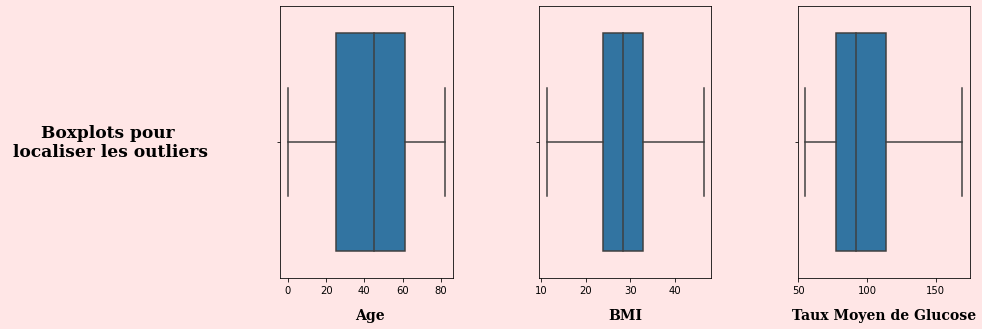

In [27]:
fig = plt.figure(figsize=(17,5))
gs = fig.add_gridspec(1,4)
gs.update(wspace=0.5, hspace=0.25)
tit2 = fig.add_subplot(gs[0,0])
ax3 = fig.add_subplot(gs[0,1])
ax4 = fig.add_subplot(gs[0,2])
ax5 = fig.add_subplot(gs[0,3])


background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 

ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color)

 
tit2.set_facecolor(background_color)




tit2.spines["bottom"].set_visible(False)
tit2.spines["left"].set_visible(False)
tit2.spines["top"].set_visible(False)
tit2.spines["right"].set_visible(False)
tit2.tick_params(left=False, bottom=False)
tit2.set_xticklabels([])
tit2.set_yticklabels([])
tit2.text(0.5,0.5,
         'Boxplots pour\n localiser les outliers',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=17, fontweight='bold',
         fontfamily='serif',
         color="#000000")

ax3.text(35,0.65, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax3,x='age',data=avc_data)
ax3.set_xlabel("")
ax3.set_ylabel("")

ax4.text(25, 0.65, 'BMI', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax4,x='bmi',data=avc_data)
ax4.set_xlabel("")
ax4.set_ylabel("")

ax5.text(45, 0.65, 'Taux Moyen de Glucose', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax5,x='avg_glucose_level',data=avc_data)
ax5.set_xlabel("")
ax5.set_ylabel("")




In [28]:
avc_data['smoking_status'].value_counts()
#never smoked 53% + 818 echantiollons
#formely smoked 25% + 386 echantiollons
#smokes 22% + 340 echantiollons

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [29]:
df1 = avc_data[avc_data['smoking_status'] == 'Unknown'].head(340)
df1["smoking_status"].replace({"Unknown":"smokes"},inplace=True)
avc_data.drop(avc_data.loc[avc_data['smoking_status']==1].head(340).index, inplace=True)
df1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
27419,Female,59.00,0,0,Yes,Private,Rural,76.1500,28.893237,smokes,1
60491,Female,78.00,0,0,Yes,Private,Urban,58.5700,24.200000,smokes,1
8213,Male,78.00,0,1,Yes,Private,Urban,169.3575,28.893237,smokes,1
25226,Male,57.00,0,1,No,Govt_job,Urban,169.3575,28.893237,smokes,1
64778,Male,82.00,0,1,Yes,Private,Rural,169.3575,32.500000,smokes,1
...,...,...,...,...,...,...,...,...,...,...,...
533,Female,3.00,0,0,No,children,Rural,94.1200,21.400000,smokes,0
45554,Female,1.24,0,0,No,children,Urban,62.4000,22.100000,smokes,0
55744,Male,2.00,0,0,No,children,Urban,76.2500,20.100000,smokes,0


In [30]:
df2 = avc_data[avc_data['smoking_status'] == 'Unknown'].head(386)
df2["smoking_status"].replace({"Unknown":"formerly smoked"},inplace=True)
avc_data.drop(avc_data.loc[avc_data['smoking_status']==1].head(386).index, inplace=True)
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
27419,Female,59.0,0,0,Yes,Private,Rural,76.1500,28.893237,formerly smoked,1
60491,Female,78.0,0,0,Yes,Private,Urban,58.5700,24.200000,formerly smoked,1
8213,Male,78.0,0,1,Yes,Private,Urban,169.3575,28.893237,formerly smoked,1
25226,Male,57.0,0,1,No,Govt_job,Urban,169.3575,28.893237,formerly smoked,1
64778,Male,82.0,0,1,Yes,Private,Rural,169.3575,32.500000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
51959,Male,12.0,0,0,No,children,Rural,81.7400,28.300000,formerly smoked,0
3956,Male,13.0,0,0,No,children,Urban,65.5100,25.900000,formerly smoked,0
42703,Male,74.0,0,0,Yes,Self-employed,Urban,61.7800,25.800000,formerly smoked,0


In [31]:
df3 = avc_data[avc_data['smoking_status'] == 'Unknown'].head(818)
df3["smoking_status"].replace({"Unknown":"never smoked"},inplace=True)
avc_data.drop(avc_data.loc[avc_data['smoking_status']==1].head(818).index, inplace=True)
df3

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
27419,Female,59.0,0,0,Yes,Private,Rural,76.1500,28.893237,never smoked,1
60491,Female,78.0,0,0,Yes,Private,Urban,58.5700,24.200000,never smoked,1
8213,Male,78.0,0,1,Yes,Private,Urban,169.3575,28.893237,never smoked,1
25226,Male,57.0,0,1,No,Govt_job,Urban,169.3575,28.893237,never smoked,1
64778,Male,82.0,0,1,Yes,Private,Rural,169.3575,32.500000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
60907,Male,48.0,0,0,Yes,Private,Rural,127.1300,35.000000,never smoked,0
12449,Female,34.0,0,0,Yes,Private,Rural,119.6100,26.400000,never smoked,0
2707,Male,10.0,0,0,No,children,Rural,68.9400,18.000000,never smoked,0


In [32]:
avc_data.drop(avc_data.loc[avc_data['smoking_status']=='Unknown'].index, inplace=True)
avc_data[avc_data['smoking_status'] == 'Unknown']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,


In [33]:
df4 = pd.concat([df2,df1])
df4 = pd.concat([df4,df3])
avc_data = pd.concat([avc_data,df4])
avc_data['smoking_status'].value_counts()
avc_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,169.3575,36.600000,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,169.3575,28.893237,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.9200,32.500000,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,169.3575,34.400000,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,169.3575,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
60907,Male,48.0,0,0,Yes,Private,Rural,127.1300,35.000000,never smoked,0
12449,Female,34.0,0,0,Yes,Private,Rural,119.6100,26.400000,never smoked,0
2707,Male,10.0,0,0,No,children,Rural,68.9400,18.000000,never smoked,0


In [37]:
avc_data["gender"].replace({"Female":"0","Male":"1","Other":"2"},inplace=True)
avc_data["Residence_type"].replace({"Rural":"0","Urban":"1"},inplace=True)
avc_data["ever_married"].replace({"No":"0","Yes":"1"},inplace=True)
avc_data["smoking_status"].replace({"never smoked":"0","Unknown":"1","formerly smoked":"2","smokes":"3"},inplace=True)
avc_data["work_type"].replace({"Private":"0","Self-employed":"1","Govt_job":"2","children":"3","Never_worked":"4"},inplace=True)
avc_data = avc_data.astype({"gender":"int64","ever_married":"int64","work_type":"int64","Residence_type":"int64","smoking_status":"int64"})
avc_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,1,67.0,0,1,1,0,1,169.3575,36.600000,2,1
51676,0,61.0,0,0,1,1,0,169.3575,28.893237,0,1
31112,1,80.0,0,1,1,0,0,105.9200,32.500000,0,1
60182,0,49.0,0,0,1,0,1,169.3575,34.400000,3,1
1665,0,79.0,1,0,1,1,0,169.3575,24.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...
60907,1,48.0,0,0,1,0,0,127.1300,35.000000,0,0
12449,0,34.0,0,0,1,0,0,119.6100,26.400000,0,0
2707,1,10.0,0,0,0,3,0,68.9400,18.000000,0,0


Text(0.5, 1.0, 'Heat map')

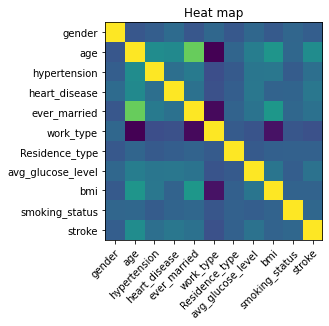

In [38]:
fig,ax = plt.subplots()
im = ax.imshow(avc_data.corr())
ax.set_xticks(np.arange(len(list(avc_data))))
ax.set_yticks(np.arange(len(list(avc_data))))
ax.set_xticklabels(list(avc_data))
ax.set_yticklabels(list(avc_data))
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
ax.set_title("Heat map")

In [39]:
def correlation(data,seuil):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>seuil : 
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [40]:
corr_features = correlation(avc_data,0.6)
corr_features

{'ever_married'}

In [41]:
avc_data = avc_data.drop(corr_features,axis=1)
avc_data

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,
9046,1,67.0,0,1,0,1,169.3575,36.600000,2,1
51676,0,61.0,0,0,1,0,169.3575,28.893237,0,1
31112,1,80.0,0,1,0,0,105.9200,32.500000,0,1
60182,0,49.0,0,0,0,1,169.3575,34.400000,3,1
1665,0,79.0,1,0,1,0,169.3575,24.000000,0,1
...,...,...,...,...,...,...,...,...,...,...
60907,1,48.0,0,0,0,0,127.1300,35.000000,0,0
12449,0,34.0,0,0,0,0,119.6100,26.400000,0,0
2707,1,10.0,0,0,3,0,68.9400,18.000000,0,0


In [42]:
#4 Modélisation

In [43]:
seed = 96 
X = avc_data.drop(['stroke'],axis=1)
Y = avc_data['stroke']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=seed,stratify=Y)
print("La forme de X_train est ",X_train.shape)
print("La forme de Y_train est ",Y_train.shape)
print("La forme de X_test est ",X_test.shape)
print("La forme de Y_test est ",Y_test.shape)

La forme de X_train est  (4088, 9)
La forme de Y_train est  (4088,)
La forme de X_test est  (1022, 9)
La forme de Y_test est  (1022,)


In [44]:
lr = LogisticRegression(random_state = seed)
lr_hyp = {'C':[0.0001,0.001,0.01,0.1,1,10,100],'max_iter':[50,75,100,120,150]}
lr_cv = GridSearchCV(lr,lr_hyp,cv=5)
lr_cv.fit(X_train,Y_train)
print(lr_cv.best_score_)
print(lr_cv.best_estimator_)
print("Le score de précision du test du modèle de la regression logistique est ", accuracy_score(Y_test,lr_cv.predict(X_test)))
print(classification_report(Y_test,lr_cv.predict(X_test)))

C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.9337085107720116
LogisticRegression(C=1, max_iter=150, random_state=96)
Le score de précision du test du modèle de la regression logistique est  0.9315068493150684
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       953
           1       0.00      0.00      0.00        69

    accuracy                           0.93      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.87      0.93      0.90      1022



C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
sv = SVC(random_state =seed)
sv_hyp = {'C':[0.001,0.01,0.1,1,10,100],'degree':[1,2,3,4,5,6]}
sv_cv = GridSearchCV(sv,sv_hyp,cv=5)
sv_cv.fit(X_train,Y_train)
print(sv_cv.best_score_)
print(sv_cv.best_estimator_)
print("Le score de précision du test du modèle SVM est ", accuracy_score(Y_test,sv_cv.predict(X_test)))
print(classification_report(Y_test,sv_cv.predict(X_test)))

0.9329747151753838
SVC(C=0.001, degree=1, random_state=96)
Le score de précision du test du modèle SVM est  0.9324853228962818
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       953
           1       0.00      0.00      0.00        69

    accuracy                           0.93      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.87      0.93      0.90      1022



C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
rf =RandomForestClassifier(random_state =seed)
rf_hyp = {'n_estimators':[5,10,20,50,100,200],'max_depth':[2,5,10,15,20]}
rf_cv = GridSearchCV(rf,rf_hyp,cv=5)
rf_cv.fit(X_train,Y_train)
print(rf_cv.best_score_)
print(rf_cv.best_estimator_)
print("Le score de précision du test du modèle de l'arbre aléatoire est ", accuracy_score(Y_test,rf_cv.predict(X_test)))
print(classification_report(Y_test,rf_cv.predict(X_test)))

0.9437368510831865
RandomForestClassifier(max_depth=20, random_state=96)
Le score de précision du test du modèle de l'arbre aléatoire est  0.9481409001956947
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       953
           1       0.90      0.26      0.40        69

    accuracy                           0.95      1022
   macro avg       0.92      0.63      0.69      1022
weighted avg       0.95      0.95      0.93      1022



In [47]:
dt =DecisionTreeClassifier(random_state =seed)
dt_hyp = {'max_depth':[2,5,10,15,20]}
dt_cv = GridSearchCV(dt,dt_hyp,cv=5)
dt_cv.fit(X_train,Y_train)
print(dt_cv.best_score_)
print(dt_cv.best_estimator_)
print("Le score de précision du test du modèle de l'arbre aléatoire est ", accuracy_score(Y_test,dt_cv.predict(X_test)))
print(classification_report(Y_test,dt_cv.predict(X_test)))

0.9329747151753838
DecisionTreeClassifier(max_depth=2, random_state=96)
Le score de précision du test du modèle de l'arbre aléatoire est  0.9324853228962818
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       953
           1       0.00      0.00      0.00        69

    accuracy                           0.93      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.87      0.93      0.90      1022



C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
kn =KNeighborsClassifier(n_neighbors=5)
kn_hyp = {'n_neighbors':[1,2,3,4,5,10,15,20]}
kn_cv = GridSearchCV(kn,kn_hyp,cv=5)
kn_cv.fit(X_train,Y_train)
print(kn_cv.best_score_)
print(kn_cv.best_estimator_)
print("Le score de précision du test du modèle de l'arbre aléatoire est ", accuracy_score(Y_test,kn_cv.predict(X_test)))
print(classification_report(Y_test,kn_cv.predict(X_test)))

0.9322409195787559
KNeighborsClassifier(n_neighbors=20)
Le score de précision du test du modèle de l'arbre aléatoire est  0.9315068493150684
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       953
           1       0.40      0.03      0.05        69

    accuracy                           0.93      1022
   macro avg       0.67      0.51      0.51      1022
weighted avg       0.90      0.93      0.90      1022



In [50]:
# Upsampling
sm = SMOTE(random_state = 2)
X_train_res, Y_train_res = sm.fit_sample(X_train,Y_train.ravel())

In [51]:
lr = LogisticRegression(random_state = seed)
lr_hyp = {'C':[0.0001,0.001,0.01,0.1,1,10,100],'max_iter':[50,75,100,120,150]}
lr_cv = GridSearchCV(lr,lr_hyp,cv=5)
lr_cv.fit(X_train_res,Y_train_res)
print(lr_cv.best_score_)
print(lr_cv.best_estimator_)
print("Le score de précision du test du modèle de la regression logistique est ", accuracy_score(Y_test,lr_cv.predict(X_test)))
print(classification_report(Y_test,lr_cv.predict(X_test)))

C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.8033563801216079
LogisticRegression(C=0.1, random_state=96)
Le score de précision du test du modèle de la regression logistique est  0.735812133072407
              precision    recall  f1-score   support

           0       0.97      0.74      0.84       953
           1       0.16      0.70      0.26        69

    accuracy                           0.74      1022
   macro avg       0.57      0.72      0.55      1022
weighted avg       0.92      0.74      0.80      1022



C:\Users\m2k\anaconda3.2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
sv = SVC(random_state =seed)
sv_hyp = {'C':[0.001,0.01,0.1,1,10,100],'degree':[1,2,3,4,5,6]}
sv_cv = GridSearchCV(sv,sv_hyp,cv=5)
sv_cv.fit(X_train_res,Y_train_res)
print(sv_cv.best_score_)
print(sv_cv.best_estimator_)
print("Le score de précision du test du modèle SVM est ", accuracy_score(Y_test,sv_cv.predict(X_test)))
print(classification_report(Y_test,sv_cv.predict(X_test)))

0.8112199901166663
SVC(C=100, degree=1, random_state=96)
Le score de précision du test du modèle SVM est  0.7172211350293543
              precision    recall  f1-score   support

           0       0.97      0.72      0.83       953
           1       0.16      0.72      0.26        69

    accuracy                           0.72      1022
   macro avg       0.56      0.72      0.54      1022
weighted avg       0.92      0.72      0.79      1022



In [53]:
rf =RandomForestClassifier(random_state =seed)
rf_hyp = {'n_estimators':[5,10,20,50,100,200],'max_depth':[2,5,10,15,20]}
rf_cv = GridSearchCV(rf,rf_hyp,cv=5)
rf_cv.fit(X_train_res,Y_train_res)
print(rf_cv.best_score_)
print(rf_cv.best_estimator_)
print("Le score de précision du test du modèle de l'arbre aléatoire est ", accuracy_score(Y_test,rf_cv.predict(X_test)))
print(classification_report(Y_test,rf_cv.predict(X_test)))

0.9404847990030725
RandomForestClassifier(max_depth=20, random_state=96)
Le score de précision du test du modèle de l'arbre aléatoire est  0.9129158512720157
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       953
           1       0.39      0.49      0.43        69

    accuracy                           0.91      1022
   macro avg       0.67      0.72      0.69      1022
weighted avg       0.92      0.91      0.92      1022



In [54]:
dt =DecisionTreeClassifier(random_state =seed)
dt_hyp = {'max_depth':[2,5,10,15,20]}
dt_cv = GridSearchCV(dt,dt_hyp,cv=5)
dt_cv.fit(X_train_res,Y_train_res)
print(dt_cv.best_score_)
print(dt_cv.best_estimator_)
print("Le score de précision du test du modèle de l'arbre aléatoire est ", accuracy_score(Y_test,dt_cv.predict(X_test)))
print(classification_report(Y_test,dt_cv.predict(X_test)))

0.9057447091936488
DecisionTreeClassifier(max_depth=20, random_state=96)
Le score de précision du test du modèle de l'arbre aléatoire est  0.8796477495107632
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       953
           1       0.28      0.49      0.36        69

    accuracy                           0.88      1022
   macro avg       0.62      0.70      0.64      1022
weighted avg       0.92      0.88      0.89      1022



In [55]:
kn =KNeighborsClassifier(n_neighbors=5)
kn_hyp = {'n_neighbors':[1,2,3,4,5,10,15,20]}
kn_cv = GridSearchCV(kn,kn_hyp,cv=5)
kn_cv.fit(X_train_res,Y_train_res)
print(kn_cv.best_score_)
print(kn_cv.best_estimator_)
print("Le score de précision du test du modèle de l'arbre aléatoire est ", accuracy_score(Y_test,kn_cv.predict(X_test)))
print(classification_report(Y_test,kn_cv.predict(X_test)))

0.9320909266699612
KNeighborsClassifier(n_neighbors=2)
Le score de précision du test du modèle de l'arbre aléatoire est  0.8913894324853229
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       953
           1       0.31      0.51      0.39        69

    accuracy                           0.89      1022
   macro avg       0.64      0.71      0.66      1022
weighted avg       0.92      0.89      0.90      1022



In [56]:

with open('Machine à vecteur support Finale.pk1','wb') as f:
    dill.dump(lr_cv, f)
with open('Regression logistique Finale.pk1','wb') as f:
    dill.dump(sv_cv, f)
with open('K-Plus proche voisin Finale.pk1','wb') as f:
    dill.dump(kn_cv, f)
with open('Arbre décisionnel Finale.pk1','wb') as f:
    dill.dump(dt_cv, f)
with open('Forêt aléatoire Finale.pk1','wb') as f:
    dill.dump(rf_cv, f)